<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Quality-notebook" data-toc-modified-id="Data-Quality-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Quality notebook</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries-and-loading-data" data-toc-modified-id="Importing-libraries-and-loading-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries and loading data</a></span></li><li><span><a href="#A-quick-overview-of-the-data" data-toc-modified-id="A-quick-overview-of-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>A quick overview of the data</a></span></li><li><span><a href="#Patient_id-problem" data-toc-modified-id="Patient_id-problem-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Patient_id problem</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Names-:-Given-and-Surname" data-toc-modified-id="Names-:-Given-and-Surname-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Names : Given and Surname</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Street-number" data-toc-modified-id="Street-number-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Street number</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Address-1" data-toc-modified-id="Address-1-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Address 1</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Suburb" data-toc-modified-id="Suburb-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Suburb</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Postcode" data-toc-modified-id="Postcode-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Postcode</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#State" data-toc-modified-id="State-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>State</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Date-of-Birth" data-toc-modified-id="Date-of-Birth-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Date of Birth</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Age" data-toc-modified-id="Age-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Age</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.11.1"><span class="toc-item-num">1.11.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Phone-Number" data-toc-modified-id="Phone-Number-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Phone Number</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.12.1"><span class="toc-item-num">1.12.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Overall-Conclusion" data-toc-modified-id="Overall-Conclusion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overall Conclusion</a></span><ul class="toc-item"><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Missing-Data" data-toc-modified-id="Missing-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing Data</a></span></li><li><span><a href="#Data-Quality" data-toc-modified-id="Data-Quality-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Quality</a></span></li></ul></li></ul></div>

# Data Quality notebook 

We explore the dataset and check which preprocessing techniques we will require  

## Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

engine = create_engine('sqlite:///../data/data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

## A quick overview of the data

In [2]:
df_pcr.shape

(8800, 2)

In [3]:
df_patient.shape

(20000, 12)

In [4]:
df_patient.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None


In [5]:
df_patient.dtypes

patient_id         int64
given_name        object
surname           object
street_number    float64
address_1         object
suburb            object
postcode          object
state             object
date_of_birth    float64
age              float64
phone_number      object
address_2         object
dtype: object

## Patient_id problem

Duplicate ids, Duplicate ids for different people

In [6]:
df_patient.shape

(20000, 12)

In [7]:
df_patient.patient_id.nunique()

19798

In [8]:
df_patient.patient_id.describe()

count     20000.000000
mean     553918.938750
std      260234.961111
min      100005.000000
25%      330194.250000
50%      556327.500000
75%      779419.500000
max      999993.000000
Name: patient_id, dtype: float64

In [9]:
df_patient[df_patient.duplicated(subset=["patient_id"], keep=False)].set_index("patient_id").sort_index()

,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
patient_id,,,,,,,,,,,
109304,zachary,farronato,30.0,outtrim avenue,como,2196,vic,19090801.0,31.0,07 22894061,the reefs
109304,bailey,donaldson,20.0,tardent street,ryde,0812,qld,19580310.0,26.0,07 13479210,None
110207,toby,brock,4.0,merriman crescent,baralaba,3025,nsw,19000424.0,35.0,08 33842007,leitrim
110207,zali,brock,32.0,hedger street,toorak,5038,act,NaN,22.0,08 96818512,None
115791,hannah,clarke,70.0,galmarra street,mayfield,7010,vic,19830828.0,25.0,04 70760611,None
115791,marley,colquhoun,7.0,boolee street,craigie,2534,qld,19000705.0,NaN,04 59547776,None
116375,isabella,None,6.0,gosse street,hawthorn,2620,nsw,19050713.0,26.0,None,None
116375,emiily,piorkowski,12.0,cowper street,peakhurst,6027,None,19821018.0,28.0,04 79403053,None
119816,jed,rollins,63.0,mauldon street,macquarie fields,4169,nsw,19010805.0,NaN,07 73786737,None


In [10]:
(df_patient.groupby('patient_id').count().given_name > 1).sum()

190

### Conclusion

This column contains some duplicates (at least 400). When analysing some of those duplicates some of them seem to have some piece of data in common. 

## Names : Given and Surname

Missing Data, Typos

In [11]:
name_none = df_patient[df_patient.given_name.isnull() | df_patient.surname.isnull()]
name_none.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
11,187498,None,mason,20.0,padbury street,granville,6239,qld,19201021.0,38.0,03 85186450,pioneer lodge
17,429365,None,coffey,1409.0,musson close,beaconsfield upper,5019,wa,NaN,30.0,03 13369308,silverweir
56,573254,None,wilde,3.0,must circuit,ormeau,0800,nsw,19590826.0,37.0,04 40239609,None
59,370936,None,coulson,118.0,murphy street,st agnes,2062,qld,19820225.0,33.0,04 05029557,None
66,168148,kallie,None,18.0,lampard circuit,bassendean,2632,nsw,19380612.0,NaN,02 37706143,None


In [12]:
name_none.shape

(861, 12)

In [68]:
df_patient.groupby('given_name').count().patient_id.sort_values(ascending=False).head(10)

given_name
emiily      373
joshua      340
thomas      262
jack        260
lachlan     213
sophie      210
benjamin    208
william     205
isabella    194
nicholas    192
Name: patient_id, dtype: int64

### Conclusion

Given names and surnames are some of the most diverse data we can have in a dataset. They are of great use when analysing duplicates. However this column looks like it contains an awful lot of typos. Sorting by given name already show that at least the operator could not spell "Emily" correctly. This will surely lead to a lot preprocessing.
The column also contains a lot of missing values.

## Street number

Missing data, wrong datatype, wrong info / typo

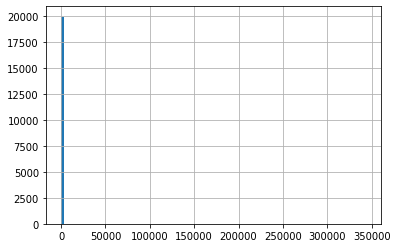

In [14]:
df_patient.street_number.fillna(0, inplace = True)
df_patient.street_number.astype('int', inplace= True)
df_patient.street_number.hist(bins=100)

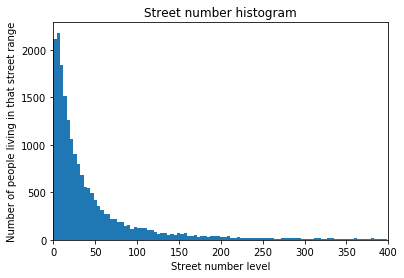

In [15]:
plt.title("Street number histogram")
plt.xlabel("Street number level")
plt.ylabel("Number of people living in that street range")
plt.xlim(left=0,right=400)
plt.hist(df_patient[df_patient.street_number < 400].street_number.values, bins=100)
plt.show()

In [16]:
df_patient.street_number.describe()

count     20000.000000
mean         96.925150
std        2458.128201
min           0.000000
25%           9.000000
50%          24.000000
75%          59.000000
max      342951.000000
Name: street_number, dtype: float64

In [17]:
df_patient[df_patient.street_number < 400].shape

(19334, 12)

### Conclusion

This column contains outliers, some of them being actual values and other being typos or type errors (floats without a dot...). There are about 600 outliers in the street number column. Australia is a big country with long roads / streets but lets not take exceptions and make them regular cases.

## Address 1

Incorrect input : no space, typos

In [18]:
df_patient.address_1.head()

0            rene street
1           andrea place
2       mountain circuit
3    cumberlegeicrescent
4          lowrie street
Name: address_1, dtype: object

In [19]:
df_patient.address_1.nunique()

4326

In [20]:
df_patient.address_1.unique()

array(['rene street', 'andrea place', 'mountain circuit', ...,
       'collie street', 'halligan place', 'alinda place'], dtype=object)

In [21]:
df_patient.loc[3]

patient_id                    465838
given_name                    sienna
surname                     craswell
street_number                     39
address_1        cumberlegeicrescent
suburb                         henty
postcode                        3620
state                             wa
date_of_birth            1.98408e+07
age                               30
phone_number             02 62832318
address_2                     jodane
Name: 3, dtype: object

### Conclusion

This column contains information with a lot of typos, this will make our work harder when trying to match duplicates

## Suburb

In [22]:
df_patient.suburb.unique()

array(['ellenbrook', 'east preston', 'prospect', ..., 'kooyong',
       'preston beach', 'erindale'], dtype=object)

In [23]:
df_patient.suburb.nunique()

2925

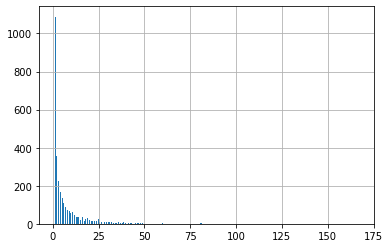

In [24]:
df_patient.groupby('suburb').count().patient_id.sort_values(ascending=False).hist(bins=df_patient.suburb.nunique()//10)

### Conclusion

- This column does not look very suspicious

## Postcode

In [25]:
all(df_patient.postcode.str.len() == 4)

False

In [26]:
df_patient[df_patient.postcode.str.len()!=4]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
95,587879,lillianna,mdonald,12.0,newman morris circuit,coombabah,None,vic,19351020.0,26.0,03 90265874,hazel hill
144,451279,emiily,wilkey,78.0,catani place,thornlie,None,nsw,19560516.0,NaN,07 82156796,None
161,723094,stephanie,kilby,22.0,kenyon circuit,brooweena,None,nsw,19080109.0,33.0,03 81017217,None
214,237848,amaya,clisby,175.0,rutherford crescent,downer,None,None,19531215.0,8.0,07 19639912,boxwood hill
425,559451,victoria,clarke,70.0,warragamba avenue,ringwood,None,vic,19210903.0,35.0,04 30756412,None
436,789944,None,dolliver,5.0,fawkner street,judds creek,None,nsw,19900331.0,32.0,07 91663216,None
453,297392,jayden,lodge,1.0,hytten place,bicton,None,nsw,NaN,NaN,None,kippilaw
570,554605,lewis,robson,45.0,miller street,paddington,None,sa,19900810.0,32.0,08 92978336,None
797,130355,stella,nguyen,196.0,callabonna street,wattle glen,None,vic,19521113.0,25.0,03 58363786,view banks cottage
859,109337,gianni,papageorgiou,20.0,hobbs street,wagaman,None,None,19211005.0,12.0,03 98411510,brambletye vinyard


In [27]:
df_patient[df_patient.postcode.str.isnumeric() == False]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
3976,810644,juliana,grosvenor,5.0,connelly pace,3023,port noarlunga south,tas,19991215.0,NaN,03 55227740,None
4080,986559,kirra,choi-lundberg,102.0,centaurus street,6168,naremburn,vic,19261104.0,27.0,08 69584599,None
5792,752873,lochlan,blake,258.0,None,4216,toowoobma,wa,19080821.0,31.0,02 84630666,None
6218,902348,isaac,nakoje,19.0,collier street,6017,brighton,None,19640421.0,8.0,02 69439226,None
6618,678110,jaden,green,5.0,dovey place,3185,oraneg,vic,19151204.0,23.0,02 73534391,None
9653,690348,andrew,ryan,20.0,mainwaring rich circuit,3020,blacktown,wa,19760001.0,22.0,None,None
9718,727290,tiffany,loukes,31.0,leal place,467l0,forest hill,nsw,19760706.0,23.0,None,pangani
11333,738103,hugi,pascoe,167.0,leita court,3023,port lincoln,nsw,19040401.0,NaN,07 84786511,None
14255,684359,sonia,green,50.0,kalgoorlie crescent,6112,ashfield,sa,NaN,9.0,03 46671647,None
15479,355033,abby,yoob,243.0,weston street,3181,forest hill,None,19660615.0,26.0,02 68667816,None


### Conclusion

The post code in australia is composed of 4 numbers. Using this rule we can easily find outliers such as missing values or text data. 

## State

In [28]:
df_patient.state.unique()

array(['wa', 'nsw', 'qld', 'nt', 'sa', None, 'act', 'vic', 'tas', 'vc',
       'qkd', 's', 'qlh', 'nswf', 'ndw', 'nsjw', 'nsza', 'nu', 'vicf',
       'vicb', 'nswt', 'nsg', 'qlf', 'wr', 'vicz', 'nsa', 'wab', 'qxlj',
       'ai', 'qlg', 'vil', 'qln', 'qlc', 'ws', 'qls', 'viv', 'ta', 'nswm',
       'nfw', 'vie', 'nsq', 'nxw', 'nfsw', 'vkc', 'qlr', 'ns', 'naw',
       'ic', 'nwd', 'qod', 'tab', 'nsd', 'vmv', 'fsw', 'vich', 'nwx', 'a',
       'qlt', 'nsc', 'wu', 'nss', 'vucm', 'vix', 'nsy', 'ng', 'nse', 'w',
       'ql', 'sv', 'taz', 'tak', 'vh', 'nze', 'nswb', 'qlz', 'vicm',
       'waw', 'nsew', 'nvq', 'wz', 'gic', 'vid', 'qldg', 'vuv', 'vib',
       'qud', 'nsxw', 'nlw', 'vif', 'nsn', 'nssw', 'nsgs', 'vicw', 'wq',
       'vq', 'nswn', 'tad', 'qle', 'vcci', 'qdd', 'vi', 'qldy', 'nsjh'],
      dtype=object)

In [29]:
df_patient.state.nunique()

102

In [30]:
df_patient.state.isnull().sum()

1990

In [31]:
# Selecting patients based on state being either missing or typo
bad_state = df_patient[~df_patient.state.isin(df_patient.groupby('state').count().patient_id.sort_values(ascending=False).head(8).index)]
bad_state.shape

(2129, 12)

In [32]:
bad_state.state.unique()

array([None, 'vc', 'qkd', 's', 'qlh', 'nswf', 'ndw', 'nsjw', 'nsza', 'nu',
       'vicf', 'vicb', 'nswt', 'nsg', 'qlf', 'wr', 'vicz', 'nsa', 'wab',
       'qxlj', 'ai', 'qlg', 'vil', 'qln', 'qlc', 'ws', 'qls', 'viv', 'ta',
       'nswm', 'nfw', 'vie', 'nsq', 'nxw', 'nfsw', 'vkc', 'qlr', 'ns',
       'naw', 'ic', 'nwd', 'qod', 'tab', 'nsd', 'vmv', 'fsw', 'vich',
       'nwx', 'a', 'qlt', 'nsc', 'wu', 'nss', 'vucm', 'vix', 'nsy', 'ng',
       'nse', 'w', 'ql', 'sv', 'taz', 'tak', 'vh', 'nze', 'nswb', 'qlz',
       'vicm', 'waw', 'nsew', 'nvq', 'wz', 'gic', 'vid', 'qldg', 'vuv',
       'vib', 'qud', 'nsxw', 'nlw', 'vif', 'nsn', 'nssw', 'nsgs', 'vicw',
       'wq', 'vq', 'nswn', 'tad', 'qle', 'vcci', 'qdd', 'vi', 'qldy',
       'nsjh'], dtype=object)

### Conclusion

There is a total of 16 states, territories and external territories in Australia. This column can be used to match the postcodes and verify if the information is correct or not. We can also mark as incorrect most of the outliers. We could also infer the correct state based on the identified typo

## Date of Birth

In [33]:
df_patient.date_of_birth.nunique()

13654

In [34]:
df_patient.date_of_birth.astype('str').str.len().unique()

array([10,  3], dtype=int64)

In [35]:
(df_patient.date_of_birth.isnull().sum() / df_patient.date_of_birth.shape[0]) * 100

10.055

In [36]:
df_patient[df_patient.date_of_birth.astype('str').str.len() == 3].date_of_birth.unique()

array([nan])

In [37]:
df_patient.date_of_birth.sort_values().unique()

array([12900410., 19000105., 19000106., ..., 19991227., 19991229.,
             nan])

In [38]:
# we verify that all our dates now have the same format
(df_patient.date_of_birth.fillna(19000000.0).astype('int').astype('str').str.len() != 8).sum()

0

In [39]:
# pandas.to_datetime seems to act up so we'll parse it ourselves
date = df_patient.date_of_birth.fillna(19000000.0).astype('int').astype('str')
year, month, day = map(lambda series: series.astype('int'), [date.str.slice(0,4), date.str.slice(4, 6), date.str.slice(6,8)])

In [40]:
year.describe()

count    20000.000000
mean      1944.584000
std         31.508197
min       1290.000000
25%       1916.000000
50%       1944.000000
75%       1972.000000
max       1999.000000
Name: date_of_birth, dtype: float64

In [41]:
month.describe()

count    20000.000000
mean         6.110200
std          5.675506
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         99.000000
Name: date_of_birth, dtype: float64

### Conclusion

This is the most messy column I have yet seen in the dataset. The format changes a lot and there are a lot of missing values (10%). However this information could be used to match with the age and verify veracity. Some dates have been entered with types for example the operator changed 1920 to 1290. Even this entry looks suspicious since being 100 years old makes you an outlier. There also seems to be confusion in the date format entries sometimes month can be switched with either days or years. To actually parse it accurately we will need a rule based algorithm that will be more complex.

The sample we have seems to be amongst the elder people of Australia. Half of the people were born before 1944. This may be related to the fact that elder people tend to be tested more than younger ones that have fewer symptoms.  

## Age

In [42]:
df_patient.age.describe()

count    16003.000000
mean        27.534337
std          7.807008
min          0.000000
25%         24.000000
50%         29.000000
75%         33.000000
max         92.000000
Name: age, dtype: float64

In [43]:
fill_val = df_patient.date_of_birth.dropna().median()
df_patient["year"] = df_patient.date_of_birth.fillna(fill_val).astype('int').astype('str').str.slice(0,4).astype('int')
age_year = df_patient[["age", "year"]]
age_year.head()

,age,year
0,32.0,1971
1,34.0,1912
2,22.0,1981
3,30.0,1984
4,31.0,1934


In [44]:
age_year.dropna(how='any').corr()

,age,year
age,1.000000,-0.002138
year,-0.002138,1.000000


In [45]:
d = pd.concat([(2020 - age_year['age']), age_year['year']], axis=1)
d.columns=["estimated_year", "given_year"]
d.head()

,estimated_year,given_year
0,1988.0,1971
1,1986.0,1912
2,1998.0,1981
3,1990.0,1984
4,1989.0,1934


In [46]:
(np.sqrt((d.estimated_year - d.given_year)**2)).mean()

43.61038555270887

### Conclusion

Well... It doesn't add up with our previous analysis. Either one is wrong and the other right or everything is a lie. Age and year are not correlated at all. The MSE is about 43 years of difference.

## Phone Number

In [47]:
df_patient.phone_number.head()

0    08 86018809
1    02 97793152
2    02 20403934
3    02 62832318
4    03 69359594
Name: phone_number, dtype: object

In [48]:
df_patient.phone_number.str.len().unique()

array([11., nan])

In [49]:
df_patient.phone_number.isnull().sum() / df_patient.shape[0]

0.04595

In [50]:
df_patient.phone_number.dropna().duplicated(keep=False).sum() / df_patient.shape[0]

0.0926

In [60]:
phone_dup = df_patient[df_patient.duplicated(subset=["phone_number"], keep=False)].set_index("phone_number").sort_index()
phone_dup.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,address_2,year
phone_number,,,,,,,,,,,,
02 00325977,311830,taaila,None,16.0,mcnicoll place,orange,6230,vic,19180603.0,NaN,None,1918
02 00325977,210155,taalia,None,19.0,mcnicollyplace,orange,6230,vic,19180603.0,64.0,None,1918
02 00325977,525466,taalia,None,19.0,mcnicoll place,orange,6230,vic,19180603.0,26.0,None,1918
02 00493853,870746,tyler,able,15.0,marcus clarke street,wannissa,3333,nsw,19830504.0,NaN,None,1983
02 00493853,268616,tyler,able,154.0,marcus clarke street,wanniassa,3333,nsw,19830504.0,NaN,None,1983


In [52]:
phone_dup.reset_index().groupby(['phone_number', 'given_name']).count()

patient_id  surname  street_number  address_1  \
phone_number given_name                                                  
02 00325977  taaila               1        0              1          1   
             taalia               2        0              2          2   
02 00493853  tyler                3        3              3          3   
02 01272164  adam                 4        4              4          4   
02 01871708  thomas               1        1              1          1   
             to                   1        1              1          1   
02 02079822  tahlia               2        2              2          2   
02 03546747  jacob                3        3              3          3   
             jaob                 1        1              1          1   
02 03755662  james                1        0              1          1   
             jim                  1        0              1          1   
02 04356284  briekle              1        1              1          1   
             brielle              2        2              2          2   
02 05657798  anastasia            1        1              1          1   
             stacia               2        2              2          2   
02 08338146  charli               3        3              3          3   
02 08415021  emiily               2        2              2          2   
02 08766786  timothy              2        2              2          2   
02 08989117  mitchell             3        3              3          3   
02 12378670  rachel               2        2              2          2   
02 12420398  isabella             2        2              2          2   
02 12938957  chelsea              3        3              3          3   
02 13710140  ballantyne           1        1              1          1   
             jordan               2        2              2          2   
02 13744238  claire               2        2              2          2   
02 14864045  joshua               2        2              2          2   
02 15127378  montana              3        3              3          3   
02 15230330  benjamin             2        2              2          2   
02 16031470  erin                 2        2              2          2   
             ero                  1        1              1          1   
...                             ...      ...            ...        ...   
08 81656149  madrlixe             1        1              1          1   
08 81917893  lachlan              2        2              2          2   
08 83458359  hannah               2        2              2          2   
08 83974521  xanthe               3        0              3          3   
08 84533051  george               2        2              2          2   
             jeorje               1        1              1          1   
08 85475258  sophie               3        3              3          0   
08 85693635  hannah               3        3              3          3   
08 86934171  elysse               2        2              2          2   
08 87474386  livvie               1        1              1          1   
             olivia               2        2              2          2   
08 89204784  cheree               3        3              3          3   
08 90163028  christian            3        3              3          3   
             krystian             1        1              1          1   
08 91194518  beth                 4        4              4          4   
08 92720184  phoenix              2        2              2          2   
08 94905506  kera                 1        1              1          1   
             kiera                2        2              2          2   
08 95307237  abbey                2        2              2          0   
             hope                 1        1              1          0   
08 96593328  annalise             3        3              3          2   
08 97331829  tara            

In [61]:
phone_dup = df_patient[df_patient.phone_number.isin((phone_dup.reset_index().groupby(['phone_number']).count().patient_id > 1).index)].sort_values('phone_number')

In [67]:
phone_dup.groupby('phone_number').count().index.values

array(['02 00325977', '02 00493853', '02 01272164', '02 01871708',
       '02 02079822', '02 03546747', '02 03687263', '02 03755662',
       '02 04356284', '02 05657798', '02 08338146', '02 08415021',
       '02 08766786', '02 08989117', '02 12378670', '02 12420398',
       '02 12938957', '02 13710140', '02 13744238', '02 14864045',
       '02 15127378', '02 15230330', '02 16031470', '02 17184151',
       '02 17609707', '02 20501853', '02 21219598', '02 21753649',
       '02 21825167', '02 22087371', '02 22125804', '02 23069900',
       '02 23986599', '02 24225099', '02 24976027', '02 25001242',
       '02 25160752', '02 25263077', '02 26075601', '02 26956185',
       '02 28324179', '02 29457458', '02 30358152', '02 30368694',
       '02 31042861', '02 31449585', '02 31920085', '02 32207241',
       '02 32818101', '02 32847751', '02 33544106', '02 35014181',
       '02 35035349', '02 36023310', '02 36697860', '02 37249432',
       '02 37541638', '02 37735421', '02 37735964', '02 379064

### Conclusion

Phone number seems to be less messy as other columns. Some 5% is null and 9% is duplicated but this can be attributed to either typos or people giving their house phone number and living in the same house. Also the phone number duplicates allow us to detect very easily for obvious duplicates. This phone number information is a goldmine.

# Overall Conclusion

## Duplicates

The dataset has several duplicates. Even the supposedly unique identifier "patient_id" has at least 400 duplicates.

## Missing Data

Another problem that comes with the dataset is the amount of missing data. There can be columns filled with missing values.

## Data Quality

The final biggest problem that will arise when trying to identify duplicates is the one of Data Quality. Lots of inputs ressemble typos. There are datatype mismatches and formating errors everywhere. Outliers hiding in every column.